<a href="https://colab.research.google.com/github/Argivist/AI_Model_Notebooks/blob/Tutorial_based/BinarySentimentClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [8]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
!pip list

## seting up dependencies


In [10]:
import tensorflow as tf
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## limiting gpu usage

In [11]:
#getting all gpus
gpus=tf.config.experimental.list_physical_devices('GPU')
#limiting the gpu usage
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

## cleaning the image data


In [12]:
import cv2
import imghdr

In [13]:
from matplotlib import pyplot as plt

In [14]:
data_dir='//content//drive//My Drive//Intro to AI//Sentiment'

In [15]:
image_exts=['jpeg','jpg','bmp','png']

In [16]:
#getting items in directory
os.listdir(data_dir)

['Sad', 'happy']

In [17]:
#getting files in a golder in directory
#os.listdir(os.path.join(data_dir,'blank'))[0]

In [18]:
#getting file size
#os.path.getsize(os.path.join(data_dir,'blank',os.listdir(os.path.join(data_dir,'happy'))[0]))

### *reomoving images that are*


*   below 10kb
*   *not* part of the extension list


In [19]:
image_number=0

In [20]:
#deleting small images
size_limit=10000
for folder in os.listdir(data_dir):
  for file_ in os.listdir(os.path.join(data_dir,folder)):
    if os.path.getsize(data_dir+"//"+folder+"//"+file_)<size_limit:
       os.remove(data_dir+"//"+folder+"//"+file_)
    else:
      image_number+=1

print(image_number)


602


In [21]:
#keeping valid file types
image_number=0

for folder in os.listdir(data_dir):
  for file_ in os.listdir(os.path.join(data_dir,folder)):
    imgpath=os.path.join(data_dir,folder,file_)
    try:
      img=cv2.imread(imgpath)
      tip=imghdr.what(imgpath)
      if(tip not in image_exts):
        os.remove(img)
      else:
        image_number+=1
    except Exception as e:
      pass

print(image_number)

602


### aditional caution

In [22]:
import os
import imghdr

def check_images(s_dir, ext_list):
    bad_images = []
    bad_ext = []
    s_list = os.listdir(data_dir)
    for klass in s_list:
        klass_path = os.path.join(s_dir, klass)
        if os.path.isdir(klass_path):
            file_list = os.listdir(klass_path)
            for f in file_list:
                f_path = os.path.join(klass_path, f)
                tip = imghdr.what(f_path)
                if ext_list.count(tip) == 0:
                    bad_images.append(f_path)
    return bad_images, bad_ext

source_dir = data_dir
good_exts = ['jpg', 'png', 'jpeg', 'gif', 'bmp']
bad_file_list, bad_ext_list = check_images(source_dir, good_exts)

if len(bad_file_list) != 0:
    print('The following images are not in a recognized format:')
    for i in range(len(bad_file_list)):
        print(bad_file_list[i])
else:
    print('All images are in a recognized format.')


All images are in a recognized format.


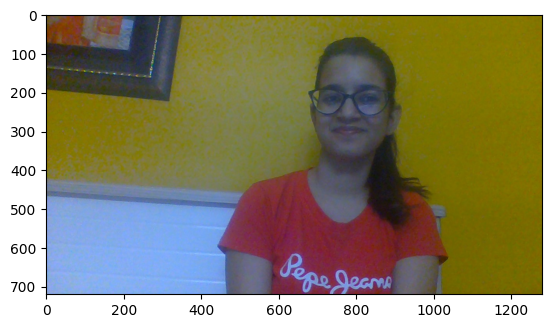

In [23]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

# Load Data

In [24]:
tf.data.Dataset??

In [25]:
tf.keras.utils.image_dataset_from_directory??

In [26]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [27]:
import numpy as np
from matplotlib import pyplot as plt

In [28]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)#,bacth_size=8,image_size=(128,128))

Found 602 files belonging to 2 classes.


In [29]:
data_iter=data.as_numpy_iterator()#allows us to acess the images

In [30]:
data_iter

In [31]:
batch=data_iter.next()

In [32]:
batch[0]#images as numpy arrays

array([[[[168.71875 , 162.71875 , 150.53125 ],
         [178.28125 , 163.28125 , 170.28125 ],
         [176.      , 161.1875  , 168.1875  ],
         ...,
         [105.1875  , 114.      , 169.      ],
         [108.      , 113.      , 168.      ],
         [ 98.8125  , 113.      , 173.90625 ]],

        [[172.28125 , 160.84375 , 163.4375  ],
         [178.4375  , 162.4375  , 164.      ],
         [185.3125  , 167.875   , 168.15625 ],
         ...,
         [101.28125 , 111.5625  , 169.71875 ],
         [106.      , 110.28125 , 170.4375  ],
         [108.15625 , 110.28125 , 177.      ]],

        [[172.      , 155.      , 163.      ],
         [177.9375  , 163.9375  , 162.9375  ],
         [187.46875 , 167.46875 , 167.53125 ],
         ...,
         [101.0625  , 107.46875 , 170.53125 ],
         [105.      , 111.      , 173.      ],
         [108.46875 , 109.46875 , 176.46875 ]],

        ...,

        [[160.15625 , 172.5     , 112.9375  ],
         [141.28125 , 146.6875  ,  95.21875 ]

In [33]:
batch[0].shape#automatically reshapes the images

(32, 256, 256, 3)

In [34]:
batch[1]#labels

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

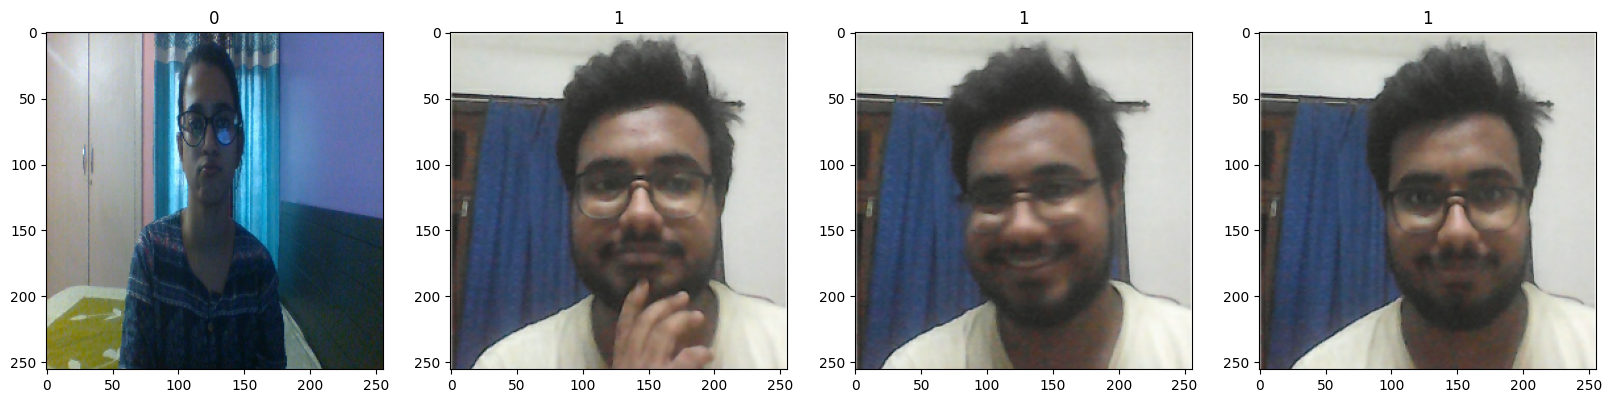

In [35]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [36]:
import pandas as pd
#labels
label={}
count=4
for i in os.listdir(data_dir):
  label[count]=i
  count-=1

label
#dont trust labeling

{4: 'Sad', 3: 'happy'}

# PreProcessing


## Scaling data


In [37]:
data=data.map(lambda x,y:(x/255 ,y))

In [38]:
scaled_iter=data.as_numpy_iterator()

In [39]:
batch=scaled_iter.next()

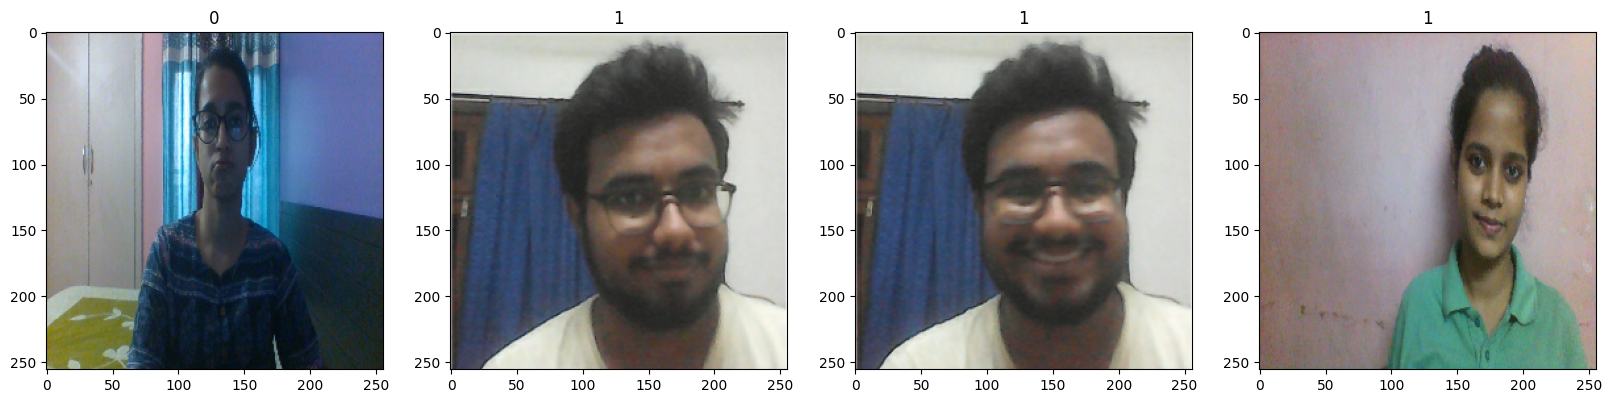

In [40]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

## Spliting data

into:


*   Training
*   Testing
*   VAlidation



In [41]:
len(data)

19

In [42]:
training_size=int(len(data)*.7) #training set
testing_size=int(len(data)*.1) +1#final evaluation after training
validating_size=int(len(data)*.2) +1#evaluate model whilst training

In [43]:
training_size,testing_size,validating_size

(13, 2, 4)

In [44]:
training_size+testing_size+validating_size

19

In [45]:
train=data.take(training_size)
val=data.skip(training_size).take(validating_size)
test=data.skip(training_size+validating_size).take(validating_size)

In [46]:
len(train),len(test),len(val),(len(train)+len(test)+len(val))

(13, 2, 4, 19)

# Deep Learning

## Build the Deep Neural Network

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense, Flatten, Dropout

In [48]:
#model=Sequential([Conv2d(),])
model=Sequential()

In [49]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [50]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy() ,metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Training


In [52]:
logdir='logs'

In [53]:
#logging checkpoint
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [54]:
history=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])#epoch- how longto train for

Epoch 1/20
13/13 [==============================] - 49s 3s/step - loss: 0.2177 - accuracy: 0.9038 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 2/20
13/13 [==============================] - 40s 3s/step - loss: 2.0929e-04 - accuracy: 1.0000 - val_loss: 9.4348e-06 - val_accuracy: 1.0000
Epoch 3/20
13/13 [==============================] - 38s 2s/step - loss: 1.4104e-05 - accuracy: 1.0000 - val_loss: 2.3043e-06 - val_accuracy: 1.0000
Epoch 4/20
13/13 [==============================] - 43s 3s/step - loss: 1.3293e-06 - accuracy: 1.0000 - val_loss: 3.1539e-07 - val_accuracy: 1.0000
Epoch 5/20
13/13 [==============================] - 54s 4s/step - loss: 4.3237e-07 - accuracy: 1.0000 - val_loss: 9.9872e-08 - val_accuracy: 1.0000
Epoch 6/20
13/13 [==============================] - 45s 3s/step - loss: 2.8969e-07 - accuracy: 1.0000 - val_loss: 2.2723e-07 - val_accuracy: 1.0000
Epoch 7/20
13/13 [==============================] - 53s 4s/step - loss: 1.9988e-07 - accuracy: 1.0000 - val_loss: 9.2069

In [55]:
history

In [56]:
history.history

{'loss': [0.21768887341022491,
  0.00020928896265104413,
  1.4104027286521159e-05,
  1.3293370102474e-06,
  4.323672726513905e-07,
  2.8968557330699696e-07,
  1.9988277699667378e-07,
  2.2628690032888699e-07,
  1.6161592952812498e-07,
  1.3018068045766995e-07,
  1.5865342106735625e-07,
  1.6425579474343976e-07,
  1.337265160827883e-07,
  1.4669556946955709e-07,
  1.2373934055176505e-07,
  1.2973748653166695e-07,
  1.2621113398836314e-07,
  1.3345110971840768e-07,
  1.1195142235465028e-07,
  1.011025645425434e-07],
 'accuracy': [0.9038461446762085,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.001048200880177319,
  9.434771527594421e-06,
  2.3043176042847335e-06,
  3.153949990064575e-07,
  9.987166293967675e-08,
  2.2723351378317602e-07,
  9.206855366983291e-08,
  1.9949743546021637e-07,
  1.5391658791941154e-07,
  1.305464110146204e-07,
  1.6722178486361372e-07,
  1.2189329368084145e

## Plotting Performance

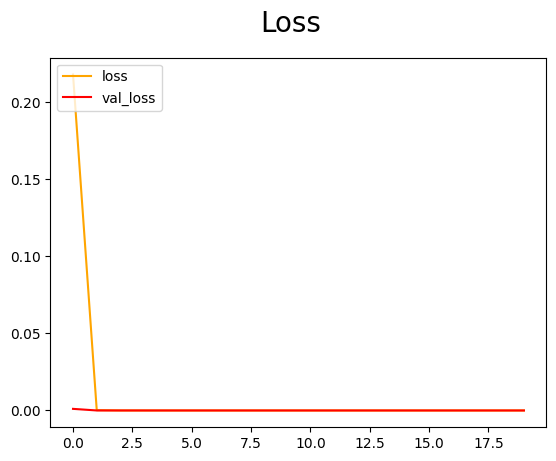

In [57]:
fig=plt.figure()

plt.plot(history.history['loss'],color='orange',label='loss')
plt.plot(history.history['val_loss'],color='red',label='val_loss')

fig.suptitle("Loss",fontsize=20)

plt.legend(loc='upper left')
plt.show()

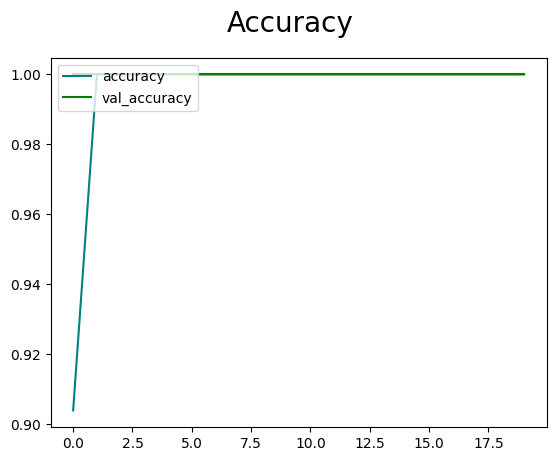

In [73]:
fig=plt.figure()

plt.plot(history.history['accuracy'],color='teal',label='accuracy')
plt.plot(history.history['val_accuracy'],color='green',label='val_accuracy')

fig.suptitle("Accuracy",fontsize=20)

plt.legend(loc='upper left')
plt.show()

# Evaluating


## Evaluate

In [59]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [60]:
precision=Precision()
recall=Recall()
accuracy=BinaryAccuracy()

In [61]:
len(test)

2

In [62]:
for batch in test.as_numpy_iterator():
  X,y=batch
  Ypred=model.predict(X)
  precision.update_state(y,Ypred)
  recall.update_state(y,Ypred)
  accuracy.update_state(y,Ypred)

1/1 [==============================] - 1s 826ms/step


In [63]:
print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


## Test

### Loading test image

In [64]:
import cv2

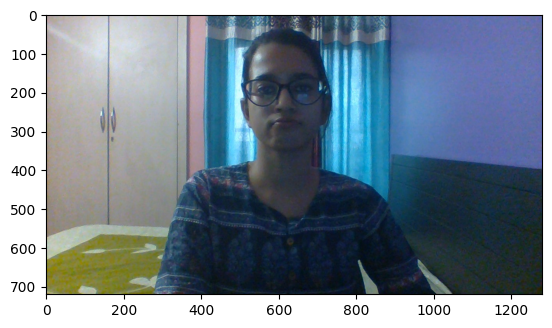

In [65]:
img=cv2.imread('//content//drive//MyDrive//Intro to AI//Sentiment//Sad//WIN_20201118_15_40_03_Pro.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

### reszing the miag before passing it through model

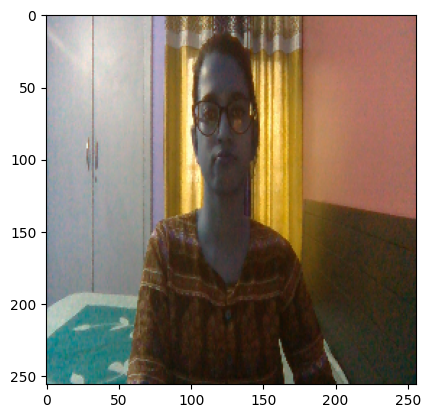

In [66]:
resize=tf.image.resize(img,(256,256))
plt.imshow((resize.numpy().astype(int)))
plt.show()

### converting the value into a form the model accepts

In [67]:
resize.shape

TensorShape([256, 256, 3])

In [68]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [69]:
X_testpred=np.expand_dims(resize/255,0)
X_testpred.shape

(1, 256, 256, 3)

### Predicting

In [70]:
Ypred=model.predict(X_testpred)

1/1 [==============================] - 0s 43ms/step


In [71]:
Ypred

array([[0.998634]], dtype=float32)

In [74]:
if Ypred>0.5:
  print("sad")
else:
  print("happy")

sad


# Saving the model

## save the model

In [75]:
model.save(os.path.join('//content//drive//MyDrive//Intro to AI','model','happysadmodel.h5'))# h5 is a serialisation format like zip,rar,pickle

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## reloading the model

In [77]:
from tensorflow.keras.models import load_model

In [78]:
new_model =load_model(os.path.join('//content//drive//MyDrive//Intro to AI','model','happysadmodel.h5'))

In [79]:
yhat=model.predict(X_testpred)

1/1 [==============================] - 0s 35ms/step


In [80]:
if yhat>0.5:
  print("sad")
else:
  print("happy")

sad
